In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join

def get_files(path):
    return [join(path, f) for f in listdir(path) if isfile(join(path, f))]

def get_points_in_file(filepath):
    print(filepath)
    points = []
    with open(filepath, 'rU') as fp:
        for line in fp:
            line_split = line.split('\t')
            if line_split[-1] == '':
                del line_split[-1]
            for idx in range(0, len(line_split), 2):
                try:
                    points.append((float(line_split[idx].strip()), float(line_split[idx + 1].strip())))
                except ValueError:
                    print(line_split)
    return points

def tuples_to_xy(tuples):
    tmp = np.transpose(tuples)
    return tmp[0], tmp[1]

def norm_on_range(x, y, x_range=None, y_range=None):
    if x_range is None:
        x_range = (min(x), max(x))
    if y_range is None:
        y_range = (min(y), max(y))
        
    x = [(xx - x_range[0]) / (x_range[1] - x_range[0]) for xx in x]
    y = [(yy - y_range[0]) / (y_range[1] - y_range[0]) for yy in y]
        
    return x, y

def generate_histogram(x, y, res=20.0, title='Density Estimation', x_range=None, y_range=None, hexbin=False):
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    
    if x_range is None:
        x_range = (min(x), max(x))
    if y_range is None:
        y_range = (min(y), max(y))
    
    if hexbin:
        hist = ax.hexbin(x, y, gridsize=res, cmap=plt.cm.jet, extent=(x_range[0], x_range[1], y_range[0], y_range[1]))
        fig.colorbar(hist, ax=ax)
    else:
        hist, xbins, ybins, im = ax.hist2d(x, y, bins=(res, res), cmap=plt.cm.jet, range=[[x_range[0], x_range[1]], [y_range[0], y_range[1]]])
        fig.colorbar(im, ax=ax)
        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
    plt.axis("equal")
    plt.title(title)
    return hist

In [15]:
root = r'C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual'
hillary = get_files(root + r'\hillary')
heather = get_files(root + r'\heather')
kelsey = get_files(root + r'\kelsey')
pat = get_files(root + r'\pat')

hillary_points = [val for sublist in [get_points_in_file(fp) for fp in hillary] for val in sublist]
heather_points = [val for sublist in [get_points_in_file(fp) for fp in heather] for val in sublist]
kelsey_points = [val for sublist in [get_points_in_file(fp) for fp in kelsey] for val in sublist]
pat_points = [val for sublist in [get_points_in_file(fp) for fp in pat] for val in sublist]

C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\hillary\actual_coordinates (2).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\hillary\actual_coordinates (3).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\hillary\actual_coordinates.txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\hillary\actual_coordinates_6squig.txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\heather\actual_coordinates.txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\kelsey\actual_coordinates (2).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\kelsey\actual_coordinates (3).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\kelsey\actual_coordinates (4).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\kelsey\actual_coordinates (5).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\kelsey\actual_coordinates (6).txt
C:\Users\Kevin\Google Drive\iPyNotebooks\iPosition\actual\kelsey\actual_coordina

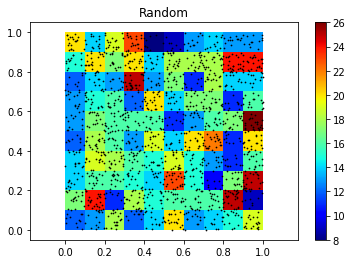

C:\Users\Kevin\Desktop\tmp\actual_coordinates.txt


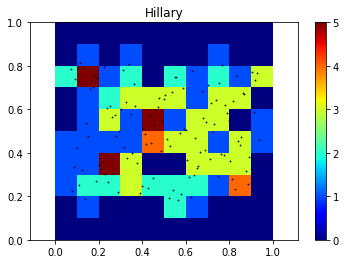

In [10]:
import matplotlib.pyplot as plt
import numpy.random as rand

histogram_size = 10

title = 'Random'
color = 'black'
x, y = (rand.random(1600), rand.random(1600))
random_points = [(xx, yy) for xx, yy in zip(x, y)]
im0 = generate_histogram(x, y, title=title, res=histogram_size)
plt.scatter(x, y, c=color, s=0.5)
plt.show()

acfiles = [r'C:\Users\Kevin\Desktop\tmp\actual_coordinates.txt']

acpts = [val for sublist in [get_points_in_file(fp) for fp in acfiles] for val in sublist]
title = 'Hillary'
color = 'black'
x, y = tuples_to_xy(acpts)
x, y = norm_on_range(x, y, x_range=(-640, 640), y_range=(-512, 512))
ac_normed_points = [(xx, yy) for xx, yy in zip(x, y)]
im1 = generate_histogram(x, y, title=title, res=histogram_size, x_range=(0, 1), y_range=(0, 1))
plt.scatter(x, y, c=color, s=0.5)
plt.show()

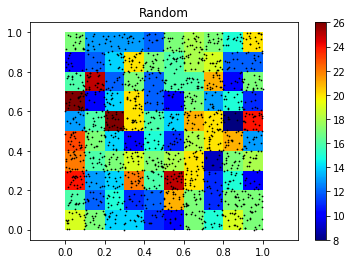

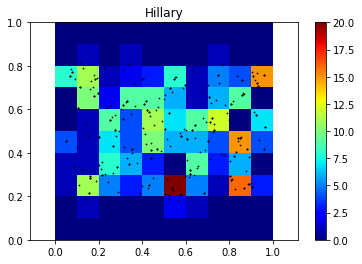

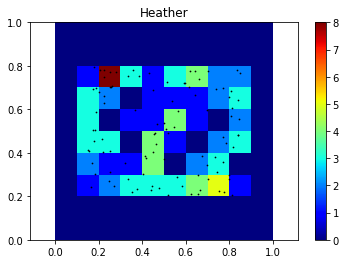

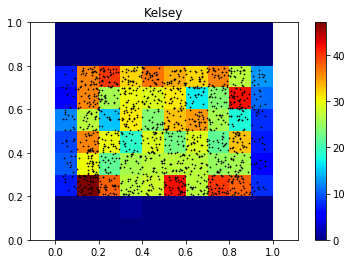

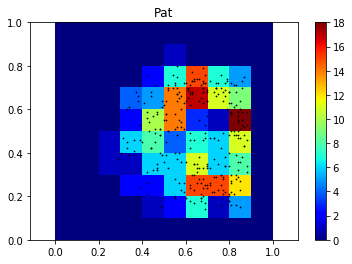

In [52]:
import matplotlib.pyplot as plt
import numpy.random as rand

histogram_size = 10

title = 'Random'
color = 'black'
x, y = (rand.random(1600), rand.random(1600))
random_points = [(xx, yy) for xx, yy in zip(x, y)]
im0 = generate_histogram(x, y, title=title, res=histogram_size)
plt.scatter(x, y, c=color, s=0.5)
plt.show()

pts = hillary_points
title = 'Hillary'
color = 'black'
x, y = tuples_to_xy(pts)
x, y = norm_on_range(x, y, x_range=(-640, 640), y_range=(-512, 512))
hillary_normed_points = [(xx, yy) for xx, yy in zip(x, y)]
im1 = generate_histogram(x, y, title=title, res=histogram_size, x_range=(0, 1), y_range=(0, 1))
plt.scatter(x, y, c=color, s=0.5)
plt.show()

pts = heather_points
title = 'Heather'
color = 'black'
x, y = tuples_to_xy(pts)
x, y = norm_on_range(x, y, x_range=(-640, 640), y_range=(-512, 512))
heather_normed_points = [(xx, yy) for xx, yy in zip(x, y)]
im2 = generate_histogram(x, y, title=title, res=histogram_size, x_range=(0, 1), y_range=(0, 1))
#im2 = generate_histogram(x, y, title=title, res=histogram_size, x_range=(-640, 640), y_range=(-512, 512))
plt.scatter(x, y, c=color, s=0.5)
plt.show()

pts = kelsey_points
title = 'Kelsey'
color = 'black'
x, y = tuples_to_xy(pts)
x, y = norm_on_range(x, y, x_range=(-640, 640), y_range=(-512, 512))
kelsey_normed_points = [(xx, yy) for xx, yy in zip(x, y)]
im3 = generate_histogram(x, y, title=title, res=histogram_size, x_range=(0, 1), y_range=(0, 1))
plt.scatter(x, y, c=color, s=0.5)
plt.show()

pts = pat_points
title = 'Pat'
color = 'black'
x, y = tuples_to_xy(pts)
x, y = norm_on_range(x, y, x_range=(0, 100), y_range=(0, 100))
pat_normed_points = [(xx, yy) for xx, yy in zip(x, y)]
im4 = generate_histogram(x, y, title=title, res=histogram_size, x_range=(0, 1), y_range=(0, 1))
plt.scatter(x, y, c=color, s=0.5)
plt.show()

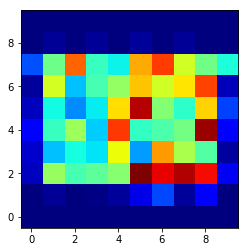

In [20]:
from sklearn.preprocessing import normalize

def normalize(l):
    total = np.sum(l)
    m = np.amin(l)
    return np.array([[(ll - m) / total for ll in li] for li in l])

nall = normalize(im1) + normalize(im2) + normalize(im3) + normalize(im4)
plt.imshow(np.array(nall).transpose(), origin='lower', cmap='jet')
plt.show()

## Sampling From a Distribution Using Kernel Density Estimation (KDE)

In the next section, we take our above distributions of points and generate an estimate of the density of these points. We can then used that estimated distribution to sample points for a monte carlo.

Some instructions and code on this method can be found here: https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats.distributions import norm

After importing our needed functions, we'll load our data and turn it into a form our model will like.

In [17]:
x, y = tuples_to_xy(acpts)
x, y = norm_on_range(x, y, x_range=(-640, 640), y_range=(-512, 512))

x = np.array(x)
y = np.array(y)

xy_train  = np.vstack([y, x]).T

Next, we'll train our model. We don't know what bandwidth parameters are best, so we'll do a cross-validated (CV) grid search with 20-fold cross-validation to try to find the best bandwidth value while simultaneously building our model.

In [18]:
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(KernelDensity(kernel='gaussian'),  # 'tophat' is other option that allows sampling
                    {'bandwidth': np.linspace(0.1, 1.0, 50)},
                    cv=20) # 20-fold cross-validation
grid.fit(xy_train)
print(grid.best_params_)

kde = grid.best_estimator_

{'bandwidth': 0.10000000000000001}


For visualization, we'll generate a grid of points to sample from for our KDE then store the result in pdf.

In [19]:
# Create grid of sample locations (default: 100x100)
xx, yy = np.mgrid[0:1:100j, 
                  0:1:100j]

xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T

pdf = np.exp(kde.score_samples(xy_sample))

We can visualize our function overlayed on our points to see how good it looks.

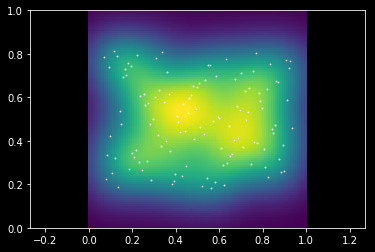

In [20]:
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):
    ax = plt.subplot(111, facecolor='black')
    plt.pcolormesh(xx, yy, np.reshape(pdf, xx.shape))
    plt.scatter(x, y, s=0.5, color='white')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('equal')
    plt.show()

Finally, for the sake of a monte carlo, we may want to sample from this function randomly. We can visualize what this would look like to see how it does. Note that for this particular method, the boundaries between 0 and 1 are not honored by the function using gaussian kernels.

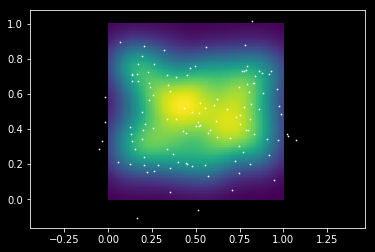

In [21]:
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):
    ax = plt.subplot(111, facecolor='black')
    plt.pcolormesh(xx, yy, np.reshape(pdf, xx.shape))
    y_sample, x_sample = np.transpose(kde.sample(n_samples=len(x)))
    plt.scatter(x_sample, y_sample, s=0.5, color='white')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.axis('equal')
    plt.show()

We can resolve this in by resampling any points which fall outside of our bounds. This artificially inflates the probabilities within the bounds in proportion to the 1-(the integral within the bounds). Given that we want the integra within the bounds to be equal to 1, this is generally a desireable compromise (although a linear offset may mean low probability regions become more probable than they deserve to be).

In [27]:
def generate_bounded_samples(kde, n_samples, x_range=(0, 1), y_range=(0, 1)):
    y_sample, x_sample = np.transpose(kde.sample(n_samples=n_samples))
    count = np.inf
    while count != 0:
        count = 0
        for idx, (x, y) in enumerate(zip(x_sample, y_sample)):
            if (not (x_range[0] <= x <= x_range[1])) or (not (y_range[0] <= y <= y_range[1])):
                count += 1
                yy, xx = np.transpose(kde.sample(n_samples=1))
                x_sample[idx] = xx[0]
                y_sample[idx] = yy[0]
    return x_sample, y_sample    

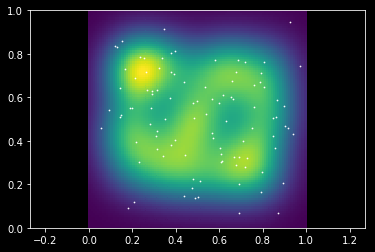

In [323]:
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):
    ax = plt.subplot(111, facecolor='black')
    plt.pcolormesh(xx, yy, np.reshape(pdf, xx.shape))
    x_sample, y_sample = generate_bounded_samples(kde, len(x))
    plt.scatter(x_sample, y_sample, s=0.5, color='white')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.axis('equal')
    plt.show()

## KDE On All Data

{'bandwidth': 0.10000000000000001}


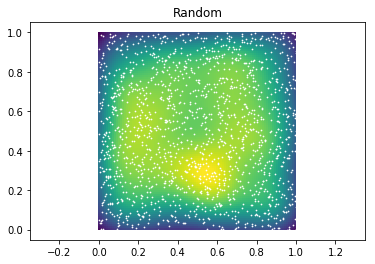

{'bandwidth': 0.10000000000000001}


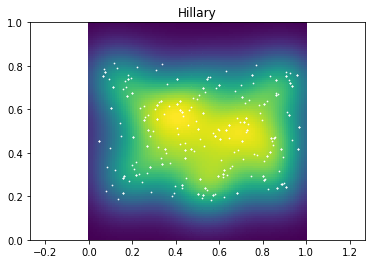

{'bandwidth': 0.10000000000000001}


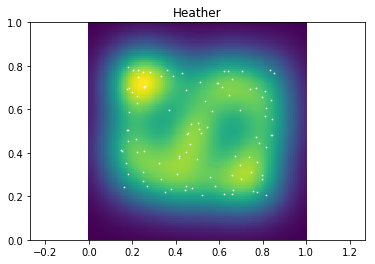

{'bandwidth': 0.10000000000000001}


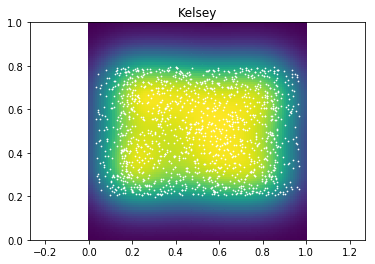

{'bandwidth': 0.10000000000000001}


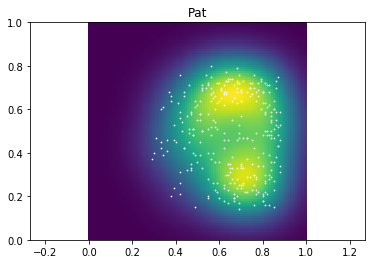

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats.distributions import norm
from sklearn.grid_search import GridSearchCV

def KDEiPosition(points, title=None):
    x, y = tuples_to_xy(points)
    x, y = norm_on_range(x, y, x_range=(0, 1), y_range=(0, 1))

    x = np.array(x)
    y = np.array(y)

    xy_train  = np.vstack([y, x]).T

    grid = GridSearchCV(KernelDensity(kernel='gaussian'),  # 'tophat' is other option that allows sampling
                        {'bandwidth': np.linspace(0.1, 1.0, 50)},
                        cv=20) # 20-fold cross-validation
    grid.fit(xy_train)
    print(grid.best_params_)

    kde = grid.best_estimator_

    # Create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[0:1:100j, 
                      0:1:100j]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T

    pdf = np.exp(kde.score_samples(xy_sample))
    
    with plt.rc_context():
        ax = plt.subplot(111)
        plt.pcolormesh(xx, yy, np.reshape(pdf, xx.shape))
        plt.scatter(x, y, s=0.5, color='white')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.axis('equal')
        if title is not None:
            plt.title(title)
        plt.show()
    
    return kde

def save_model(model, filename):
    from sklearn.externals import joblib
    joblib.dump(model, filename)

save_model(KDEiPosition(random_points, title='Random'), "random_kde.pkl")
save_model(KDEiPosition(hillary_normed_points, title='Hillary'), "hillary_kde.pkl")
save_model(KDEiPosition(heather_normed_points, title='Heather'), "heater_kde.pkl")
save_model(KDEiPosition(kelsey_normed_points, title='Kelsey'), "kelsey_kde.pkl")
save_model(KDEiPosition(pat_normed_points, title='Pat'), "pat_kde.pkl")

## Dirichlet Estimation

We can fix the problem of infinite bounds by using a different probability distribution which is bounded on [0, 1]. The Dirichlet distribution is a generalization of the beta distribution which can be used precisely for this purpose.

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math
import scipy.interpolate as interp
import scipy.optimize as opt

w, h = (1, 1)
corners = np.array([[0, 0], [w, 0], [w, h], [0, h]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % len(corners)] + corners[(i + 2) % len(corners)]) / 2.0 for i in range(len(corners))]

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

def xy2bc(xy, dim=4, tol=1.e-3, rot=0.0):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    xy = rotate((0.5, 0.5), xy, math.radians(rot))
    # I suspect this is where the problem is which causes the rotation
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) for i in range(dim)]
    return np.clip(s, tol, 1.0 - tol)

def bc2xy(bc, dim=4, tol=1.e-3, inv_rot=0.0):
    '''Converts barycentric to 2D Cartesian coordinates.'''
    # This does not successfully convert back (the points don't match the distribution when sampled)
    #xy = [sum([(np.transpose(corners)[i]).dot(bc)]) for i in range(2)]
    xy = [sum([(np.transpose(corners)[i]).dot(bc)]) for i in range(2)]
    xy = rotate((0.5, 0.5), xy, math.radians(-inv_rot))
    return xy

# I wrote this function to try to come up with a way to work with the distribution on rectangles
def draw_pdf_contours_grid(dist, resolution=20, nlevels=200, debug=False, rot=0.0, **kwargs):
    x = np.linspace(0, 1, resolution)
    y = np.linspace(0, 1, resolution)
    z = [[dist.pdf(xy2bc((xx, yy), rot=rot)) for xx in x] for yy in y]
    if debug:
        plt.scatter(x, y, color='r')
    plt.contourf(x, y, z, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.scatter([0.25], [0.75], color='r')
    
class Dirichlet(object):
    def __init__(self, alpha=[1, 1, 1, 1]):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)
    def fit_z(self, X, z, initial_guess = (2.0, 1.25, 1.25, 2.0)):
        popt, pcov = opt.curve_fit(Dirichlet.fitting_function, np.array(X), np.array(z), p0=initial_guess)

        dist_pred = Dirichlet(popt)
        z_pred = [dist_pred.pdf(xy2bc(xxyy)) for xxyy in X]

        rms = np.sqrt(np.mean((np.array(z) - np.array(z_pred))**2))
        
        self.__init__(popt)
        
        return self, rms
    def fit(self, X, density_estimator=10.0, initial_guess = (2.0, 1.25, 1.25, 2.0)):
        res = density_estimator
        xdat, ydat = np.transpose(X)
        
        hist, xbins, ybins, im = ax.hist2d(xdat, ydat, (res, res), cmap=plt.cm.jet)
        offset = 1.0/res/2.0
        x = [xx - offset for xx in xbins]
        y = [yy - offset for yy in ybins]
        del x[-1]
        del y[-1]
        xy = [[(xx, yy) for xx in x] for yy in y]
        xy = [inner for outer in xy for inner in outer]

        zdat = [hist[int(np.floor(x*res)), int(np.floor(y*res))] for x, y in zip(xdat, ydat)]
        
        popt, pcov = opt.curve_fit(Dirichlet.fitting_function, np.array(X), np.array(zdat), p0=initial_guess)

        dist_pred = Dirichlet(popt)
        z_pred = [dist_pred.pdf(xy2bc(xxyy)) for xxyy in X]

        rms = np.sqrt(np.mean((np.array(zdat) - np.array(z_pred))**2))
        
        self.__init__(popt)
        
        return self, rms
    def __str__(self):
        return 'alphas={0}, coef={1}'.format(self._alpha, self._coef)
    def __repr__(self):
        return self.__str__()
    @staticmethod
    def fitting_function(xy, a0, a1, a2, a3):
        a0 = float(a0)
        a1 = float(a1)
        a2 = float(a2)
        a3 = float(a3)
        dist = Dirichlet([a0, a1, a2, a3])
        g = [dist.pdf(xy2bc(xxyy)) for xxyy in xy]
        return g

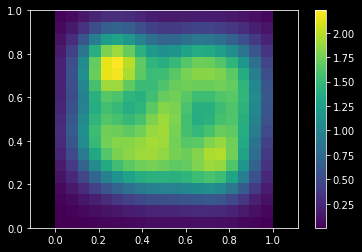

dist=alphas=[ 1.41400436  0.58146703  1.35698884  0.02494652], coef=0.0608152594722, rms=0.347518282


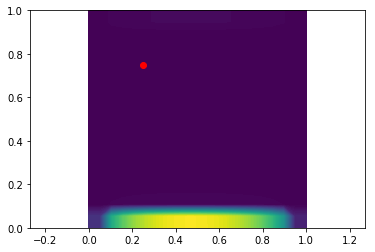

dist=alphas=[ 0.19041764  0.07622551  0.20243603  0.01689469], coef=0.000112477764528, rms=1.11146786388


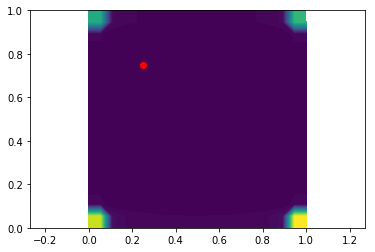

In [29]:
bin_count = 20j
xx, yy = np.mgrid[0:1:bin_count, 
                  0:1:bin_count]

xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T

pdf = np.exp(kde.score_samples(xy_sample))

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):
    ax = plt.subplot(111, facecolor='black')
    plt.pcolormesh(xx, yy, np.reshape(pdf, xx.shape))
    plt.colorbar()
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.axis('equal')
    plt.show()

ig = (5.0, 5.0, 5.0, 5.0)
    
dist_points = Dirichlet().fit([(xi, yi) for xi, yi in zip(x, y)], density_estimator=20.0, initial_guess=ig)
# Use the fit function given some density estimator and plot the results
print('dist={0}, rms={1}'.format(*dist_points))
draw_pdf_contours_grid(dist_points[0], rot=26.5, nlevels=100)
plt.show()

dist_kde = Dirichlet().fit_z(X=[(xi, yi) for xi, yi in np.vstack([yy.ravel(), xx.ravel()]).T], z=pdf, initial_guess=ig)
# Use the fit function given some density estimator and plot the results
print('dist={0}, rms={1}'.format(*dist_kde))
draw_pdf_contours_grid(dist_kde[0], rot=26.5, nlevels=100)
plt.show()